# Titanic passenger - survived prediction analysis

In [41]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [42]:
# importing Titanic dataset

titanic = pd.read_csv('titanic_train.csv')
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
titanic.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [45]:
# null values 

print(titanic.isnull().sum())

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [46]:
# removing null values ie. Cabin Column from the dataset
titanic = titanic.drop(columns = 'Cabin',axis = 1)

In [47]:
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [48]:
# replacing Age columns missing value with mean

titanic['Age'].fillna(titanic['Age'].mean(),inplace = True)

In [49]:
# replacing missing values from Embarked column with mode value
print(titanic['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [50]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace = True)

In [52]:
# check for any missing values
titanic.isnull().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [53]:
# description of titanic dataset
titanic.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
# number of people survived and those who didnt

titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# data visualization 


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

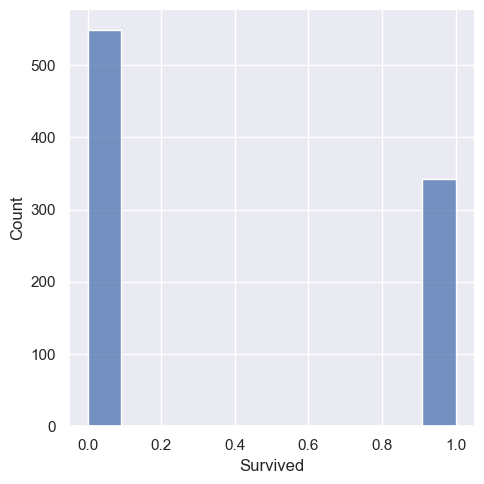

In [60]:
# plot for people survived or not

sns.displot(titanic['Survived'])

In [61]:
titanic.groupby(['Pclass','Survived']).mean()

/var/folders/50/wd3xwy3j453gvdx9x80g5_140000gn/T/ipykernel_63396/2011326876.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby(['Pclass','Survived']).mean()


Unnamed: 0  PassengerId        Age     SibSp     Parch  \
Pclass Survived                                                           
1      0         409.300000   410.300000  40.896074  0.287500  0.300000   
       1         490.772059   491.772059  34.784615  0.492647  0.389706   
2      0         451.123711   452.123711  33.266947  0.319588  0.144330   
       1         438.080460   439.080460  26.076166  0.494253  0.643678   
3      0         452.580645   453.580645  27.417500  0.672043  0.384409   
       1         393.058824   394.058824  23.232689  0.436975  0.420168   

                      Fare  
Pclass Survived             
1      0         64.684007  
       1         95.608029  
2      0         19.412328  
       1         22.055700  
3      0         13.669364  
       1         13.694887

In [62]:
titanic.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [63]:
titanic.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

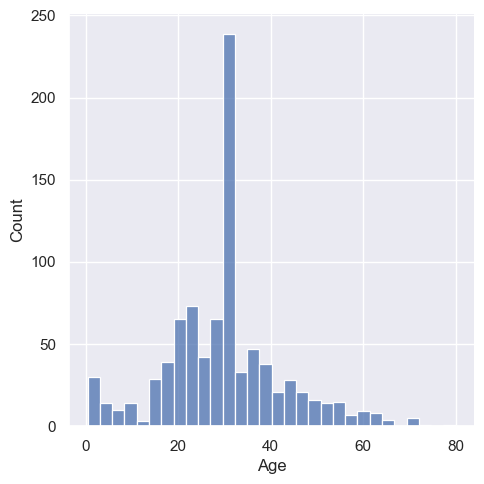

In [64]:
sns.displot(titanic['Age'])

<Axes: xlabel='Sex', ylabel='Survived'>

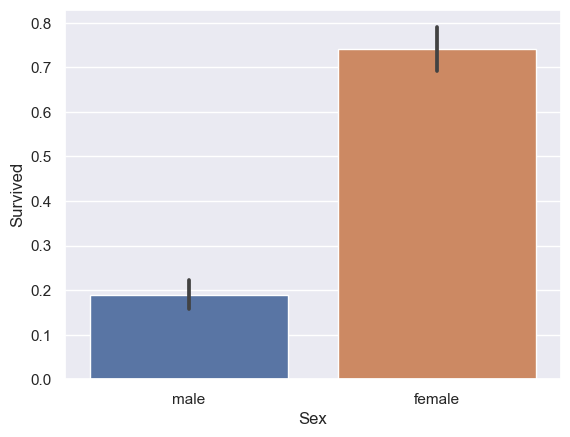

In [65]:
sns.barplot(x='Sex', y ='Survived', data = titanic)

<Axes: xlabel='Embarked', ylabel='Survived'>

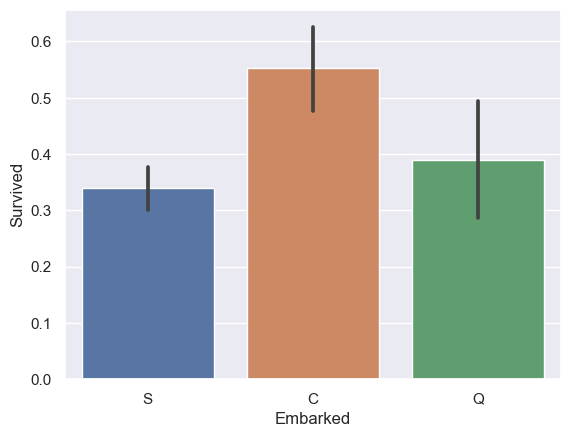

In [66]:
sns.barplot(x='Embarked', y ='Survived', data = titanic)

In [105]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [95]:
X = titanic.drop(columns = ['PassengerId', 'Name', 'Ticket','Survived','Sex','Embarked'],axis = 1)
Y = titanic['Survived']

In [96]:
print(X)

     Unnamed: 0  Pclass        Age  SibSp  Parch     Fare
0             0       3  22.000000      1      0   7.2500
1             1       1  38.000000      1      0  71.2833
2             2       3  26.000000      0      0   7.9250
3             3       1  35.000000      1      0  53.1000
4             4       3  35.000000      0      0   8.0500
..          ...     ...        ...    ...    ...      ...
886         886       2  27.000000      0      0  13.0000
887         887       1  19.000000      0      0  30.0000
888         888       3  29.699118      1      2  23.4500
889         889       1  26.000000      0      0  30.0000
890         890       3  32.000000      0      0   7.7500

[891 rows x 6 columns]


In [97]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [98]:
# Training and testing data

X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [77]:
# logistic regression

In [99]:
model = LogisticRegression()

In [100]:
model.fit(X_train, Y_train)

/Users/geetanjalijoshi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
# accuracy_score

In [101]:
X_train_prediction = model.predict(X_train)

In [102]:
print(X_train_prediction)

[1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0
 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 

In [106]:
traning_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [108]:
print(traning_data_accuracy)

0.7176966292134831
